###**Library Imports**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm

###**Importing Data (Cleaned Fama-French Data)**
Disclosure: the original data was modified to fit the project requirements. The original will also be attached.

In [ ]:
from google.colab import files

# Upload CSV file
uploaded = files.upload()

Saving Ports_Average Value Weighted Returns.csv to Ports_Average Value Weighted Returns.csv
Saving Fama_French_Factors (Only Monthly).csv to Fama_French_Factors (Only Monthly).csv


In [ ]:
df_factors = pd.read_csv("Fama_French_Factors (Only Monthly).csv") ## Fama-French Factors (Monthly Market Excess Returns)

In [ ]:
df_ports = pd.read_csv("Ports_Average Value Weighted Returns.csv") ##  Contains returns of 25 portfolios sorted by size and book-to-market

In [ ]:
df_factors.head(5)

,Unnamed: 0,Mkt-RF,SMB,HML,RF
0,192607,2.96,-2.30,-2.87,0.22
1,192608,2.64,-1.40,4.19,0.25
2,192609,0.36,-1.32,0.01,0.23
3,192610,-3.24,0.04,0.51,0.32
4,192611,2.53,-0.20,-0.35,0.31


In [ ]:
df_ports.head(5)

,Unnamed: 0,SMALL LoBM,ME1 BM2,ME1 BM3,ME1 BM4,SMALL HiBM,ME2 BM1,ME2 BM2,ME2 BM3,ME2 BM4,...,ME4 BM1,ME4 BM2,ME4 BM3,ME4 BM4,ME4 BM5,BIG LoBM,ME5 BM2,ME5 BM3,ME5 BM4,BIG HiBM
0,192607,3.7782,-0.4119,-1.9434,0.3530,2.0534,2.1904,2.4192,0.4926,-1.5770,...,1.5893,1.5278,1.1869,0.2727,2.4678,3.4539,6.0902,2.0266,3.1111,0.5623
1,192608,-2.2074,-8.7275,2.4404,0.6086,8.3968,2.1709,-1.1849,4.0084,0.4643,...,1.3336,3.8730,2.0059,2.1706,5.3422,1.0124,4.1903,2.0131,5.4849,7.7576
2,192609,-6.2113,-0.2989,-6.1982,-1.6368,0.8649,-1.8550,-1.2618,1.0829,-3.0405,...,1.0923,-0.5250,-1.7314,1.4646,0.8730,-1.2906,3.6538,0.0950,-0.7487,-2.4284
3,192610,-8.6241,-3.7532,-5.6719,5.7170,-2.5476,-1.7995,-3.2663,-5.0745,-8.0450,...,-3.3361,-2.6559,-2.0316,-3.1051,-5.3525,-2.7413,-3.0071,-2.2437,-4.6719,-5.8129
4,192611,3.4744,6.6476,2.2634,-4.7020,0.5362,2.9051,-2.3690,3.0078,4.6649,...,3.4448,2.3887,3.7403,4.9320,1.8213,4.2946,2.5326,1.5204,3.6619,2.5636


In [ ]:
df_factors.rename(columns= {"Unnamed: 0" : "date"}, inplace=True)

In [ ]:
df_factors.head(5)

,date,Mkt-RF,SMB,HML,RF
0,192607,2.96,-2.30,-2.87,0.22
1,192608,2.64,-1.40,4.19,0.25
2,192609,0.36,-1.32,0.01,0.23
3,192610,-3.24,0.04,0.51,0.32
4,192611,2.53,-0.20,-0.35,0.31


In [ ]:
df_ports.rename(columns={"Unnamed: 0" : "date"}, inplace =True)

In [ ]:
df_ports.head(5)

,date,SMALL LoBM,ME1 BM2,ME1 BM3,ME1 BM4,SMALL HiBM,ME2 BM1,ME2 BM2,ME2 BM3,ME2 BM4,...,ME4 BM1,ME4 BM2,ME4 BM3,ME4 BM4,ME4 BM5,BIG LoBM,ME5 BM2,ME5 BM3,ME5 BM4,BIG HiBM
0,192607,3.7782,-0.4119,-1.9434,0.3530,2.0534,2.1904,2.4192,0.4926,-1.5770,...,1.5893,1.5278,1.1869,0.2727,2.4678,3.4539,6.0902,2.0266,3.1111,0.5623
1,192608,-2.2074,-8.7275,2.4404,0.6086,8.3968,2.1709,-1.1849,4.0084,0.4643,...,1.3336,3.8730,2.0059,2.1706,5.3422,1.0124,4.1903,2.0131,5.4849,7.7576
2,192609,-6.2113,-0.2989,-6.1982,-1.6368,0.8649,-1.8550,-1.2618,1.0829,-3.0405,...,1.0923,-0.5250,-1.7314,1.4646,0.8730,-1.2906,3.6538,0.0950,-0.7487,-2.4284
3,192610,-8.6241,-3.7532,-5.6719,5.7170,-2.5476,-1.7995,-3.2663,-5.0745,-8.0450,...,-3.3361,-2.6559,-2.0316,-3.1051,-5.3525,-2.7413,-3.0071,-2.2437,-4.6719,-5.8129
4,192611,3.4744,6.6476,2.2634,-4.7020,0.5362,2.9051,-2.3690,3.0078,4.6649,...,3.4448,2.3887,3.7403,4.9320,1.8213,4.2946,2.5326,1.5204,3.6619,2.5636


In [ ]:
df_factors['date'] = pd.to_datetime(df_factors['date'], format='%Y%m')  ## Adding dates to Fama-French Factors
df_factors.head(5)

,date,Mkt-RF,SMB,HML,RF
0,1926-07-01,2.96,-2.30,-2.87,0.22
1,1926-08-01,2.64,-1.40,4.19,0.25
2,1926-09-01,0.36,-1.32,0.01,0.23
3,1926-10-01,-3.24,0.04,0.51,0.32
4,1926-11-01,2.53,-0.20,-0.35,0.31


###**Graphing Market Excess Return**

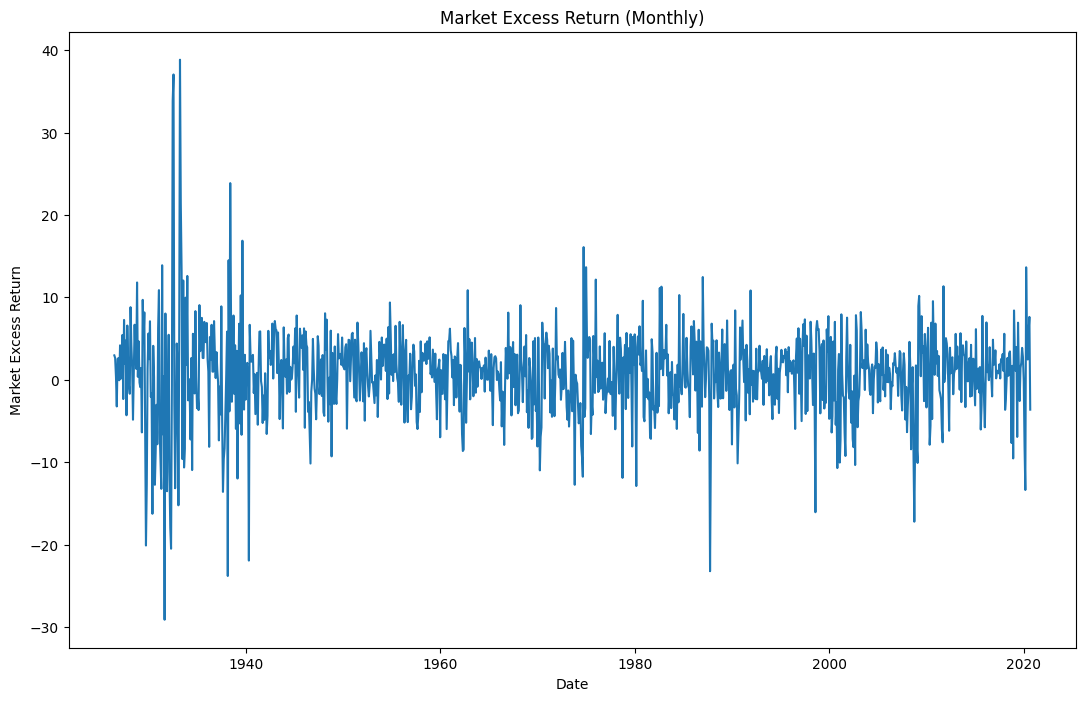

In [ ]:
plt.figure(figsize=(13, 8))
plt.plot(df_factors['date'],df_factors['Mkt-RF'])
plt.title('Market Excess Return (Monthly)')
plt.xlabel('Date')
plt.ylabel('Market Excess Return')
plt.savefig('market_excess_retuns.png')
plt.show()

In [ ]:
mean_mkt_rf = df_factors['Mkt-RF'].mean()
print(f"Mean of 'Mkt-RF': {mean_mkt_rf}")

Mean of 'Mkt-RF': 0.6700088417329796


###**Calculating Sharpe Ratio**

In [ ]:
std_excess_return = df_factors['Mkt-RF'].std()
print(f"Standard Deviation of 'Mkt-RF': {std_excess_return}")

Standard Deviation of 'Mkt-RF': 5.348059767266822


In [ ]:
sharpe_ratio = mean_mkt_rf / std_excess_return
print(f"Sharpe Ratio: {sharpe_ratio}")

Sharpe Ratio: 0.1252807318709892


In [ ]:
months = 12
annualized_sharpe = sharpe_ratio * np.sqrt(months)
print(f"Annualized Sharpe Ratio: {annualized_sharpe}")

Annualized Sharpe Ratio: 0.43398518561993366


In [ ]:
df_portfolio = df_ports.drop(columns=['date'])
df_portfolio.head(5)

,SMALL LoBM,ME1 BM2,ME1 BM3,ME1 BM4,SMALL HiBM,ME2 BM1,ME2 BM2,ME2 BM3,ME2 BM4,ME2 BM5,...,ME4 BM1,ME4 BM2,ME4 BM3,ME4 BM4,ME4 BM5,BIG LoBM,ME5 BM2,ME5 BM3,ME5 BM4,BIG HiBM
0,3.7782,-0.4119,-1.9434,0.3530,2.0534,2.1904,2.4192,0.4926,-1.5770,-0.3344,...,1.5893,1.5278,1.1869,0.2727,2.4678,3.4539,6.0902,2.0266,3.1111,0.5623
1,-2.2074,-8.7275,2.4404,0.6086,8.3968,2.1709,-1.1849,4.0084,0.4643,6.1675,...,1.3336,3.8730,2.0059,2.1706,5.3422,1.0124,4.1903,2.0131,5.4849,7.7576
2,-6.2113,-0.2989,-6.1982,-1.6368,0.8649,-1.8550,-1.2618,1.0829,-3.0405,-0.9401,...,1.0923,-0.5250,-1.7314,1.4646,0.8730,-1.2906,3.6538,0.0950,-0.7487,-2.4284
3,-8.6241,-3.7532,-5.6719,5.7170,-2.5476,-1.7995,-3.2663,-5.0745,-8.0450,-1.3213,...,-3.3361,-2.6559,-2.0316,-3.1051,-5.3525,-2.7413,-3.0071,-2.2437,-4.6719,-5.8129
4,3.4744,6.6476,2.2634,-4.7020,0.5362,2.9051,-2.3690,3.0078,4.6649,2.7292,...,3.4448,2.3887,3.7403,4.9320,1.8213,4.2946,2.5326,1.5204,3.6619,2.5636


###**Observing Portofolio Combinations with Highest and Lowest Average from the 25 Portfolios**

In [ ]:
mean_return_port = df_portfolio.mean()
print(f"mean returns for the 25 portfolios: {mean_return_port}")

mean returns for the 25 portfolios: SMALL LoBM    0.860613
ME1 BM2       0.971214
ME1 BM3       1.242587
ME1 BM4       1.400852
SMALL HiBM    1.577165
ME2 BM1       0.918313
ME2 BM2       1.198621
ME2 BM3       1.231549
ME2 BM4       1.284503
ME2 BM5       1.473535
ME3 BM1       1.002518
ME3 BM2       1.178517
ME3 BM3       1.168864
ME3 BM4       1.277198
ME3 BM5       1.335969
ME4 BM1       1.021980
ME4 BM2       1.036691
ME4 BM3       1.116094
ME4 BM4       1.199653
ME4 BM5       1.273183
BIG LoBM      0.937733
ME5 BM2       0.900052
ME5 BM3       0.972575
ME5 BM4       0.905744
BIG HiBM      1.179812
dtype: float64


In [ ]:
highest_avg_portfolio = mean_return_port.idxmax()
highest_avg_value = mean_return_port.max()

print(f'portfolio with the highest average return is: {highest_avg_portfolio}')
print(f'highest average return is: {highest_avg_value}')

portfolio with the highest average return is: SMALL HiBM
highest average return is: 1.57716525198939


In [ ]:
lowest_avg_portfolio = mean_return_port.idxmin()
lowest_avg_value = mean_return_port.min()

print(f'portfolio with the lowest average return is: {lowest_avg_portfolio}')
print(f'lowest average return is: {lowest_avg_value}')

portfolio with the lowest average return is: SMALL LoBM
lowest average return is: 0.8606133510167993


###**Preparing Data of Market Excess Returns (Fama-French Factors) for Regression**

In [ ]:
market_excess_return = df_factors['Mkt-RF']
market_excess_return.head(5)

,Mkt-RF
0,2.96
1,2.64
2,0.36
3,-3.24
4,2.53


###**Performing Linear Regression (with an intercept) for the CAPM**

In [ ]:
for portfolio in df_portfolio:
  X = market_excess_return
  X = sm.add_constant(X)

  y = df_portfolio[portfolio]

  model = sm.OLS(y,X).fit()

  print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             SMALL LoBM   R-squared:                       0.511
Model:                            OLS   Adj. R-squared:                  0.510
Method:                 Least Squares   F-statistic:                     1177.
Date:                Tue, 15 Oct 2024   Prob (F-statistic):          2.41e-177
Time:                        02:48:08   Log-Likelihood:                -4018.1
No. Observations:                1131   AIC:                             8040.
Df Residuals:                    1129   BIC:                             8050.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2205      0.253     -0.871      0.3

###**Finding the Betas for Each of the 25 Portfolios**

In [ ]:
betas = {}

for portfolio in df_portfolio:
  X = market_excess_return
  X = sm.add_constant(X)

  y = df_portfolio[portfolio]

  model = sm.OLS(y,X).fit()

  beta = model.params['Mkt-RF']
  betas[portfolio] = beta

for portfolio, beta in betas.items():
    print(f"Beta for {portfolio}: {beta}")

Beta for SMALL LoBM: 1.6136542267327165
Beta for ME1 BM2: 1.3990346977390111
Beta for ME1 BM3: 1.363442679389648
Beta for ME1 BM4: 1.263077962445607
Beta for SMALL HiBM: 1.3694661246410558
Beta for ME2 BM1: 1.2634247148224385
Beta for ME2 BM2: 1.2239633913736345
Beta for ME2 BM3: 1.194124274713863
Beta for ME2 BM4: 1.206097732197458
Beta for ME2 BM5: 1.3785975613104555
Beta for ME3 BM1: 1.243745775949151
Beta for ME3 BM2: 1.1229047941945356
Beta for ME3 BM3: 1.1166630149138126
Beta for ME3 BM4: 1.1622666057039164
Beta for ME3 BM5: 1.3722223186979638
Beta for ME4 BM1: 1.0879264360731016
Beta for ME4 BM2: 1.0782071978409236
Beta for ME4 BM3: 1.1099642261472404
Beta for ME4 BM4: 1.157695911238096
Beta for ME4 BM5: 1.409059612809002
Beta for BIG LoBM: 0.9529739846618627
Beta for ME5 BM2: 0.9443749213567885
Beta for ME5 BM3: 0.9662222008855865
Beta for ME5 BM4: 1.1007852073110898
Beta for BIG HiBM: 1.3037361319756369


###**Making a single cross-sectional regression of the (average) returns of the 25 portfolios onto their Betas**

In [ ]:
betas_series = pd.Series(betas)
average_returns_series = mean_return_port

In [ ]:
X = betas_series
X = sm.add_constant(X)

y = average_returns_series

In [ ]:
model = sm.OLS(y,X).fit()

print("Cross-Sectional Regression Results:")
print(model.summary())

Cross-Sectional Regression Results:
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.114
Model:                            OLS   Adj. R-squared:                  0.076
Method:                 Least Squares   F-statistic:                     2.971
Date:                Tue, 15 Oct 2024   Prob (F-statistic):             0.0982
Time:                        02:48:09   Log-Likelihood:                 7.9341
No. Observations:                  25   AIC:                            -11.87
Df Residuals:                      23   BIC:                            -9.431
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0

###**Forecasting**

In [ ]:
fitted_values = model.predict(X)

###**Plotting the Fitted Line along with the Actual Returns**

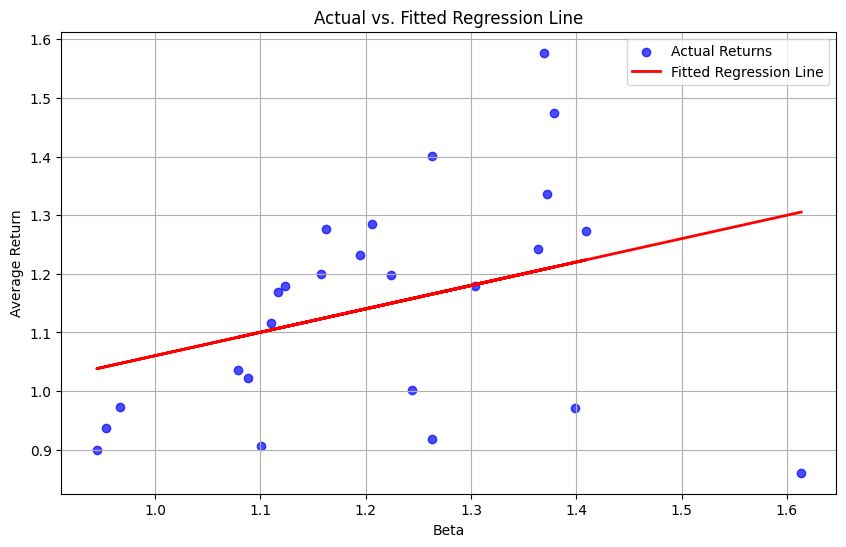

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(betas_series, y, color='blue', label='Actual Returns', alpha=0.7)
plt.plot(betas_series, fitted_values, color='red', linewidth=2, label='Fitted Regression Line')
plt.xlabel('Beta')
plt.ylabel('Average Return')
plt.title('Actual vs. Fitted Regression Line')
plt.legend()
plt.grid(True)
plt.savefig('fitted_regression_line.png')
plt.show()

###**Conclusions**
By looking at the graph, it is already possible to observe that the CAPM does not perform well in order to predict the portfolio returns. This result is expected considering that a linear model may not be optimal to make portfolio analysis.